In [ ]:
# Mathematical computation and data manipulation libraries
import pandas as pd
import numpy as np

# Data visualization libraries
import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use('seaborn-v0_8-whitegrid')
import seaborn as sns

# Machine learning libraries
import statsmodels.api as sm
import scipy.stats as stats

In [134]:
# Load data into a DataFrame
ames_df = pd.read_csv('ames_housing.csv')

# Display the first few rows of the DataFrame
ames_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [135]:
ames_df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [136]:
# Check df shape
print(f"Ames Housing Data contains {ames_df.shape[0]} rows and {ames_df.shape[1]} columns.")

Ames Housing Data contains 1460 rows and 81 columns.


In [137]:
# Display the columns
print("Columns in the dataset:\n\n", ames_df.columns)

Columns in the dataset:

 Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
      

### Column Definitions

| Column Name       | Description |
|-------------------|-------------|
| `Id` | Unique identifier for each home |
| `MSSubClass` | Building class (e.g. 20 = 1-story 1946+, 60 = 2-story 1946+) |
| `MSZoning` | Zoning classification (RL, RM, etc.) |
| `LotFrontage` | Linear feet of street connected to property |
| `LotArea` | Lot size in square feet |
| `Street` | Type of road access (Grvl, Pave) |
| `Alley` | Type of alley access (Grvl, Pave, NA) |
| `LotShape` | General shape of property (Reg, IR1, IR2, IR3) |
| `LandContour` | Flatness of property (Lvl, Bnk, HLS, Low) |
| `Utilities` | Type of utilities available |
| `LotConfig` | Lot configuration (Inside, Corner, CulDSac) |
| `LandSlope` | Slope of property (Gtl, Mod, Sev) |
| `Neighborhood` | Physical location within Ames city |
| `Condition1` | Proximity to main road or railroad (primary) |
| `Condition2` | Proximity to road/railroad (secondary, if any) |
| `BldgType` | Type of dwelling (1Fam, 2fmCon, Duplex, etc.) |
| `HouseStyle` | Style of dwelling (1Story, 2Story, SLvl, etc.) |
| `OverallQual` | Overall material/finish quality (1-10) |
| `OverallCond` | Overall condition (1-10) |
| `YearBuilt` | Year built |
| `YearRemodAdd` | Year remodeled (or same as `YearBuilt`) |
| `RoofStyle` | Type of roof (Gable, Hip, etc.) |
| `RoofMatl` | Roof material |
| `Exterior1st` | Exterior covering (primary) |
| `Exterior2nd` | Exterior covering (secondary) |
| `MasVnrType` | Masonry veneer type |
| `MasVnrArea` | Masonry veneer area in square feet |
| `ExterQual` | Exterior quality (Ex, Gd, TA, Fa, Po) |
| `ExterCond` | Exterior condition |
| `Foundation` | Type of foundation |
| `BsmtQual` | Height of basement |
| `BsmtCond` | General basement condition |
| `BsmtExposure` | Garden level or walkout exposure |
| `BsmtFinType1` | Basement finish type 1 |
| `BsmtFinSF1` | Finished square feet in `BsmtFinType1` |
| `BsmtFinType2` | Basement finish type 2 |
| `BsmtFinSF2` | Finished square feet in `BsmtFinType2` |
| `BsmtUnfSF` | Unfinished square feet of basement |
| `TotalBsmtSF` | Total basement area |
| `Heating` | Heating system type |
| `HeatingQC` | Heating quality & condition |
| `CentralAir` | Central air conditioning (Y/N) |
| `Electrical` | Electrical system |
| `1stFlrSF` | First floor square feet |
| `2ndFlrSF` | Second floor square feet |
| `LowQualFinSF` | Low-quality finished area |
| `GrLivArea` | Above-ground living area |
| `BsmtFullBath` | Full bathrooms in basement |
| `BsmtHalfBath` | Half bathrooms in basement |
| `FullBath` | Full bathrooms above ground |
| `HalfBath` | Half bathrooms above ground |
| `BedroomAbvGr` | Bedrooms above ground |
| `KitchenAbvGr` | Kitchens above ground |
| `KitchenQual` | Kitchen quality |
| `TotRmsAbvGrd` | Total rooms above ground (excl. baths) |
| `Functional` | Home functionality (Typ = typical) |
| `Fireplaces` | Number of fireplaces |
| `FireplaceQu` | Fireplace quality |
| `GarageType` | Garage location (attached, detached, etc.) |
| `GarageYrBlt` | Year garage was built |
| `GarageFinish` | Interior finish of garage |
| `GarageCars` | Size of garage (cars) |
| `GarageArea` | Size of garage in square feet |
| `GarageQual` | Garage quality |
| `GarageCond` | Garage condition |
| `PavedDrive` | Paved driveway (Y/N/P) |
| `WoodDeckSF` | Wood deck area |
| `OpenPorchSF` | Open porch area |
| `EnclosedPorch` | Enclosed porch area |
| `3SsnPorch` | 3-season porch area |
| `ScreenPorch` | Screened porch area |
| `PoolArea` | Pool area in square feet |
| `PoolQC` | Pool quality |
| `Fence` | Fence quality |
| `MiscFeature` | Other features not covered (e.g., Shed) |
| `MiscVal` | Value of miscellaneous features |
| `MoSold` | Month sold |
| `YrSold` | Year sold |
| `SaleType` | Type of sale (WD, New, COD, etc.) |
| `SaleCondition` | Condition of sale (Normal, Abnorml, etc.) |
| `SalePrice` | **Final sale price (target variable)** |

In [138]:
# Standardise column names
ames_df.columns = ames_df.columns.str.lower().str.replace(' ', '_')
ames_df.columns

Index(['id', 'mssubclass', 'mszoning', 'lotfrontage', 'lotarea', 'street',
       'alley', 'lotshape', 'landcontour', 'utilities', 'lotconfig',
       'landslope', 'neighborhood', 'condition1', 'condition2', 'bldgtype',
       'housestyle', 'overallqual', 'overallcond', 'yearbuilt', 'yearremodadd',
       'roofstyle', 'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype',
       'masvnrarea', 'exterqual', 'extercond', 'foundation', 'bsmtqual',
       'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfinsf1',
       'bsmtfintype2', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'heating',
       'heatingqc', 'centralair', 'electrical', '1stflrsf', '2ndflrsf',
       'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath',
       'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'kitchenqual',
       'totrmsabvgrd', 'functional', 'fireplaces', 'fireplacequ', 'garagetype',
       'garageyrblt', 'garagefinish', 'garagecars', 'garagearea', 'garagequal',
       'garagecond', 'paveddrive

In [139]:
# Get basic statistical info about the numerical variables
ames_df.describe()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,...,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [140]:
# Get basic statistical info on categorigal variables
ames_df.describe(include = 'O').T

,count,unique,top,freq
mszoning,1460,5,RL,1151
street,1460,2,Pave,1454
alley,91,2,Grvl,50
lotshape,1460,4,Reg,925
landcontour,1460,4,Lvl,1311
utilities,1460,2,AllPub,1459
lotconfig,1460,5,Inside,1052
landslope,1460,3,Gtl,1382
neighborhood,1460,25,NAmes,225
condition1,1460,9,Norm,1260


In [141]:
# Check for duplicats and null values
print("Duplicates:", ames_df.duplicated().sum())


print("\nColumns with null values:\n")
# Get number of null values in the columns with null values
for col in ames_df.columns:
    if ames_df[col].isnull().any():
        print(f"'{col}' has {ames_df[col].isnull().sum()} null values.")

Duplicates: 0

Columns with null values:

'lotfrontage' has 259 null values.
'alley' has 1369 null values.
'masvnrtype' has 872 null values.
'masvnrarea' has 8 null values.
'bsmtqual' has 37 null values.
'bsmtcond' has 37 null values.
'bsmtexposure' has 38 null values.
'bsmtfintype1' has 37 null values.
'bsmtfintype2' has 38 null values.
'electrical' has 1 null values.
'fireplacequ' has 690 null values.
'garagetype' has 81 null values.
'garageyrblt' has 81 null values.
'garagefinish' has 81 null values.
'garagequal' has 81 null values.
'garagecond' has 81 null values.
'poolqc' has 1453 null values.
'fence' has 1179 null values.
'miscfeature' has 1406 null values.


## Predicting Housing Prices Using Year Built

In real estate, the age of a home plays a crucial role in determining its value. Newer homes often benefit from modern construction standards, updated materials, and better energy efficiency - all of which translate to higher market prices. Older homes, while sometimes rich in character, may face depreciation due to wear and outdated features unless they’ve been extensively renovated.

In this analysis, we’ll explore how the **yearbuilt** variable - the original construction year of the house - correlates with **saleprice**, the final purchase price of the property.

We'll investigate:

- Whether newer homes consistently fetch higher prices
- If there's a depreciation trend for older constructions
- Outliers, such as historic homes with unusually high or low prices

This is a univariate analysis focused on temporal trends in housing value. Let’s dig into how **time built the value**.

> Independent variable: *'yearbuilt'*

> Dependent variable: *'saleprice'*

In [142]:
# Flattening the data to only have yearbuilt and saleprice
df_prophet = ames_df[['yearbuilt', 'saleprice']]
df_prophet

,yearbuilt,saleprice
0,2003,208500
1,1976,181500
2,2001,223500
3,1915,140000
4,2000,250000
...,...,...
1455,1999,175000
1456,1978,210000
1457,1941,266500
1458,1950,142125


<Axes: >

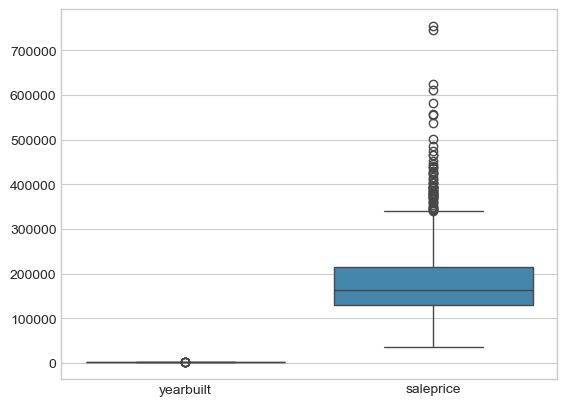

In [143]:
sns.boxplot(df_prophet)

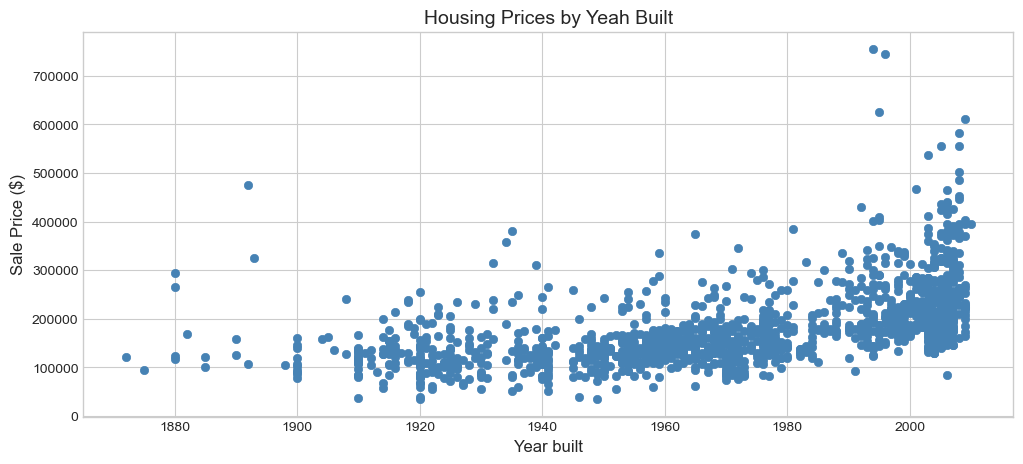

In [194]:
# Scatter plot
fig, ax = plt.subplots(figsize = (12, 5))
ax.set_title('Housing Prices by Yeah Built', fontsize = 14)
ax.scatter(df_prophet['yearbuilt'], df_prophet['saleprice'], color = '#4682b4')
ax.set_xlabel('Year built', fontsize = 12)
ax.set_ylabel('Sale Price ($)', fontsize = 12);

### Defining Variables and Calculating Their Means
Before diving into any serious regression modeling, it’s crucial to first define the variables clearly. We’ve set:

> x as the independent variable, representing the year the house was built (yearbuilt)

> y as the dependent variable, representing the house's selling price (saleprice)

Once the variables are locked in, the next step is to calculate their means — these are foundational to many statistical techniques, including Ordinary Least Squares (OLS) regression.

In [145]:
# Define x and y
x = df_prophet['yearbuilt']
y = df_prophet['saleprice']

# Define x_bar and y_bar
x_bar = df_prophet['yearbuilt'].mean()
y_bar = df_prophet['saleprice'].mean()

print("Dependent Variable (y):", y.name)
print("Independent Variable (x):", x.name)
print("Mean of x (x_bar):", round(x_bar, 3))
print("Mean of y (y_bar):", round(y_bar, 3))

Dependent Variable (y): saleprice
Independent Variable (x): yearbuilt
Mean of x (x_bar): 1971.268
Mean of y (y_bar): 180921.196


In [146]:
# Calculate covariance
cov_xy = np.cov(x, y, ddof = 0)[0][1]
print("Covariance:", round(cov_xy, 3))

Covariance: 1253777.535


In [147]:
# Get covariance and variance for both variables
cov_xy = np.cov(x, y)
print("Covariance matrix:\n", cov_xy)

Covariance matrix:
 [[9.12215413e+02 1.25463688e+06]
 [1.25463688e+06 6.31111126e+09]]


In [148]:
# Get the correlation coefficient using numpy
corr_xy = np.corrcoef(x, y)[0][1]
print("Correlation coefficient:", round(corr_xy, 3))

Correlation coefficient: 0.523


In [149]:
# Get the Pearson correlation coefficient using scipy.stats
stats.pearsonr(x, y)

PearsonRResult(statistic=np.float64(0.522897332879497), pvalue=np.float64(2.990229099012696e-103))

In [150]:
# Calculate B_1 (slope)
B_1 = corr_xy * (np.std(y) / np.std(x))
print("B_1 (slope):", round(B_1, 3))

# Calculate B_0 (intercept)
B_0 = y_bar - (B_1 * x_bar)
print("B_0 (intercept):", round(B_0, 3))

B_1 (slope): 1375.373
B_0 (intercept): -2530308.246


Correlation coefficient: 0.523
B_1 (slope): 1375.373


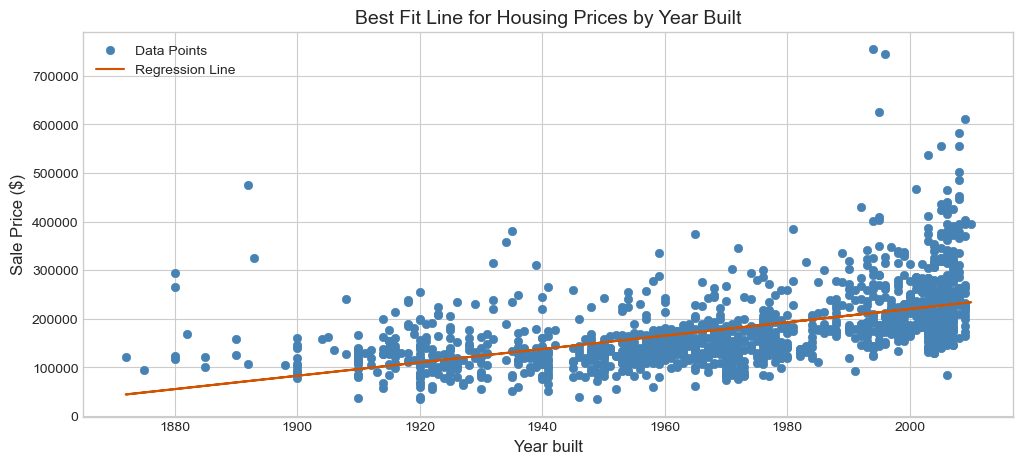

In [192]:
# Plotting the line of best fit

def best_fit(x_value, y_value):
    """Calculate the line of best fit."""

     # Scatter plot for x and y
    fig, ax = plt.subplots(figsize = (12, 5))
    ax.scatter(x, y, color = '#4682b4', label = 'Data Points')

    # Calculate and print correlation coefficient and intercept
    corr_xy = np.corrcoef(x, y)[0][1]
    B_1 = corr_xy * (np.std(y) / np.std(x))
    B_0 = y_bar - (B_1 * x_bar)

    print("Correlation coefficient:", round(corr_xy, 3))
    print("B_1 (slope):", round(B_1, 3))

    # Plot regression line
    regression_line = B_1 * x + B_0
    ax.plot(x, B_1 * x + B_0, color = '#d35400', label = 'Regression Line')
    ax.set_title('Best Fit Line for Housing Prices by Year Built', fontsize = 14)
    ax.set_xlabel('Year built', fontsize = 12)
    ax.set_ylabel('Sale Price ($)', fontsize = 12)
    ax.legend()


best_fit(x, y)

The regression line is thus: y_bar = -2530308.246 + 1375.373 * x_bar

>Interpretation:

>Any unit change in x will result in a 1375.373 change in y

In [152]:
# Create and fit model with no constant
kejani = sm.OLS(endog = y, exog = x).fit()

print(kejani.summary())

                                 OLS Regression Results                                
Dep. Variable:              saleprice   R-squared (uncentered):                   0.844
Model:                            OLS   Adj. R-squared (uncentered):              0.844
Method:                 Least Squares   F-statistic:                              7903.
Date:                Wed, 23 Jul 2025   Prob (F-statistic):                        0.00
Time:                        15:40:08   Log-Likelihood:                         -18518.
No. Observations:                1460   AIC:                                  3.704e+04
Df Residuals:                    1459   BIC:                                  3.704e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [153]:
# Add constant and plot second model
kejani2 = sm.OLS(endog = y, exog = sm.add_constant(x)).fit()

print(kejani2.summary())

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     548.7
Date:                Wed, 23 Jul 2025   Prob (F-statistic):          2.99e-103
Time:                        15:40:08   Log-Likelihood:                -18311.
No. Observations:                1460   AIC:                         3.663e+04
Df Residuals:                    1458   BIC:                         3.664e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -2.53e+06   1.16e+05    -21.858      0.0

### R², AIC, and BIC - Making Sense of Model Metrics

#### R² (Coefficient of Determination): 
**R²** measures the proportion of variance in the dependent variable (y- saleprice) that is explained by the independent variables.

>**Interpretation:**
    > - R² ranges from 0 to 1. The closer to 1, the better the fit.
    > - However, if the model **does not include a constant (intercept)**, statsmodels computes R² relative to zero rather than the mean of y (y_bar).
    > - This can **inflate R²** and give a misleading impression of model quality.

> **Recommendation:** Always include a constant unless you have a strong reason not to. Most real-world data benefits from having one.

#### AIC and BIC - Going Beyond R²

R² only captures fit. It doesn’t penalize for adding more variables. That’s where **AIC** and **BIC** come in - they balance fit with model complexity.

#### AIC: Akaike Information Criterion

> **Purpose:**
    > - Rewards goodness of fit (likelihood)
    > - Penalizes excessive complexity (more parameters)

> **Lower AIC = better model.** It’s especially useful when the goal is predictive performance.

#### BIC: Bayesian Information Criterion

> **Purpose:**
    > - Similar to AIC, but penalizes complexity more heavily as sample size increases.
    > - Prefers simpler models and is often used when interpretability is a priority.

> **Lower BIC = better model.**

#### AIC vs. BIC - Summary Comparison

| Metric | Penalizes Complexity | Best For                |
|--------|----------------------|--------------------------|
| AIC    | Lightly              | Prediction-focused models |
| BIC    | Heavily              | Interpretation-focused models |

#### Final Notes

- **R² can be misleading** when the model lacks a constant.
- **AIC and BIC are more reliable** for comparing different models, especially those with varying numbers of predictors.
- Always compare AIC and BIC **between models fitted on the same dataset**.
- If AIC and BIC both point to the same model, that’s a strong indicator of a better fit.

### Visualizing The Model  

Let’s visualize how well it captures the relationship between our variables.

The statsmodels plot_fit() method gives a quick view of the fitted line alongside the actual data points. 
In the plot below, the scatter points represent the observed values, and the line shows the model’s predicted trend.

The black vertical lines around the predictions indicate **confidence intervals**, which are computed using the **t-distribution**. These intervals help us assess how much uncertainty is associated with each prediction.

This plot gives us an intuitive sense of model performance - where it's confident, where it’s not, and how well it tracks the overall trend in the data.

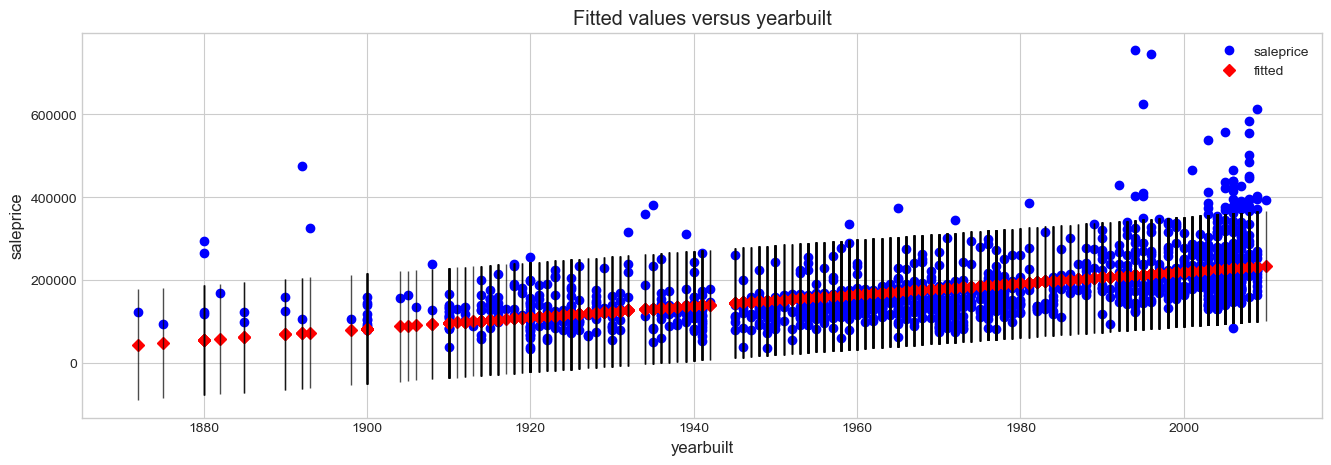

In [185]:
fig, ax = plt.subplots(figsize = (16, 5))
sm.graphics.plot_fit(kejani2, "yearbuilt", ax = ax)
plt.show();

#### Plotting model using statsmodel's abline_plot to add a best fit line to our scatter plot

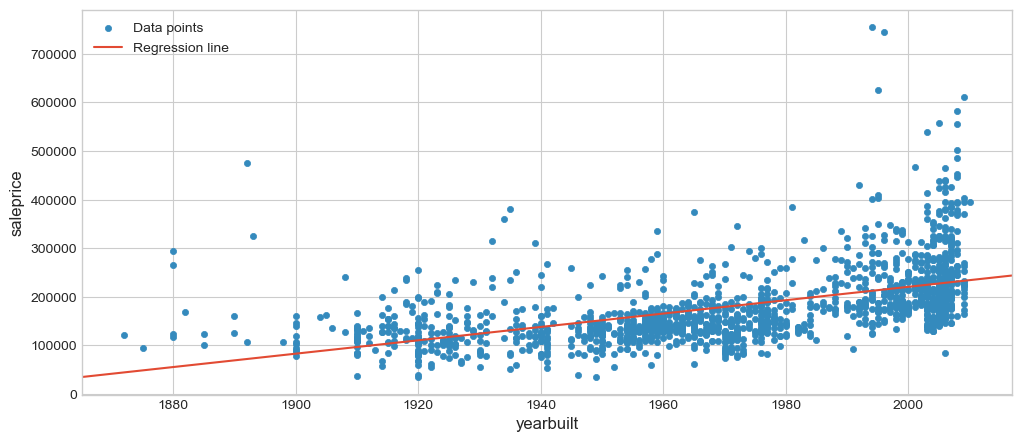

In [191]:
fig, ax = plt.subplots(figsize = (12, 5))
df_prophet.plot.scatter(x = "yearbuilt", y = "saleprice", label = "Data points", ax = ax)
sm.graphics.abline_plot(model_results = kejani2, label = "Regression line", ax = ax)
ax.legend();

### Model Residuals
Model residuals are the differences between the true values and the values predicted by the model. 

We can get them easily from the model results using the 'resid' attribute.

Model residuals can be negative or positive depending on whether the model guessed too high or too low of a value.

In [ ]:
# Getting model residuals
kejani2.resid

0       -16064.810545
1        -5929.726911
2         1685.936391
3        36468.054633
4        29561.309859
            ...      
1455    -44063.316673
1456     19819.526153
1457    127208.344467
1458     -9545.016745
1459    -24800.618764
Length: 1460, dtype: float64

### Visualising Model Residuals

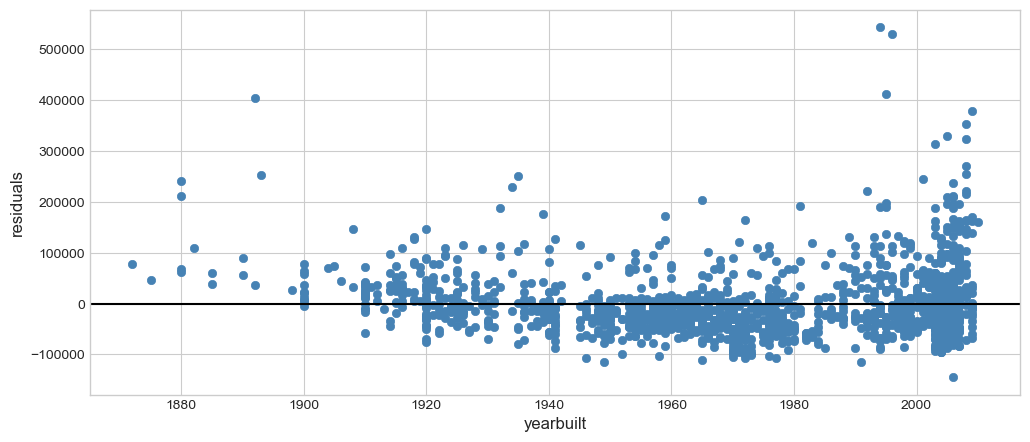

In [201]:
fig, ax = plt.subplots(figsize = (12, 5))

ax.scatter(df_prophet["yearbuilt"], kejani2.resid, color = '#4682b4')
ax.axhline(y = 0, color = "black")
ax.set_xlabel("yearbuilt")
ax.set_ylabel("residuals");

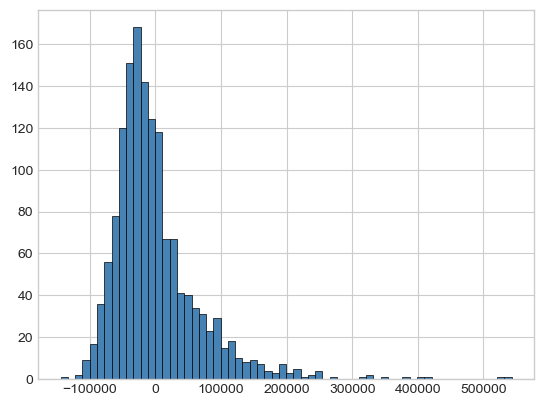

In [205]:
# Residuals histogram to get the distribution
plt.hist(kejani2.resid, bins = 'auto', color = '#4682b4', edgecolor = 'black');

Another tool used to visualize the distribution of the residuals is a **Q-Q plot**. 

It compares the quantiles of the residuals to the quantiles of a theoretical normal distribution. 

The farther from the line that the data points appear, the farther from a normal distribution they are.

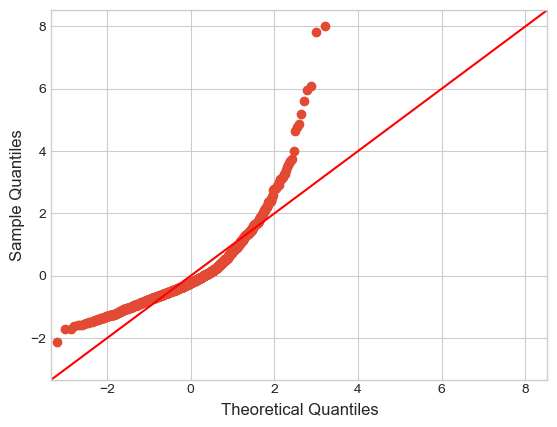

In [206]:
# Q-Q plot 
sm.graphics.qqplot(kejani2.resid, dist = stats.norm, line = '45', fit = True)
plt.show()